# Task # 3 - To Explore Unsupervised
Machine Learning

In [ ]:
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir("C:\\Users\\Ramya\\Desktop\\DataScienceTrack2020\\Grip")

In [3]:
import pandas as pd
df=pd.read_csv("Iris.csv")
print(df.shape)

(150, 6)


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df0=df.drop(["Id","Species"],axis=1)
df0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
import sklearn.preprocessing as preprocessing
data=preprocessing.scale(df0,axis=0)

In [9]:
from scipy.spatial.distance import cdist
import sklearn.cluster as cluster

In [13]:
from scipy.spatial.distance import cdist
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data)
    wss.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)))

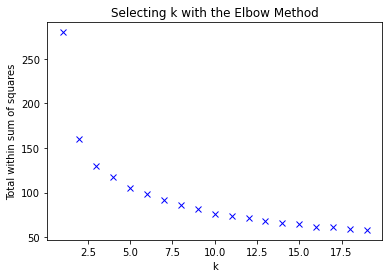

In [16]:
plt.plot(K, wss,'bx')
plt.xlabel('k')
plt.ylabel('Total within sum of squares')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [22]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=3,random_state=200).fit(data).labels_

In [23]:
metrics.silhouette_score(data,labels,metric="euclidean",sample_size=150,random_state=200)
#sillhoutte measure computationally expensive

0.580184463257396

In [28]:
for i in range(2,7):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(data).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(data,labels,metric="euclidean",
                                 sample_size=150,random_state=200)))

Silhoutte score for k= 2 is 0.580184463257396
Silhoutte score for k= 3 is 0.46214947389312006
Silhoutte score for k= 4 is 0.3885856108109507
Silhoutte score for k= 5 is 0.34527610262904046
Silhoutte score for k= 6 is 0.33036175005121143


In [31]:
x = kmeans.fit_predict(data)

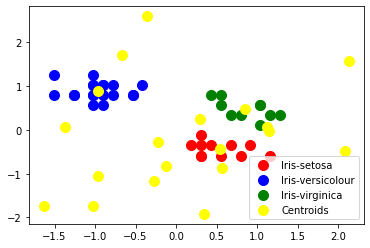

In [32]:
plt.scatter(data[x == 0, 0], data[x == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data[x == 1, 0], data[x == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data[x == 2, 0], data[x == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()